In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# `Data Science Project`

### 1. Get data

##### Retrieval
- Visit the link for the StreetEasy data: https://streeteasy.com/blog/download-data/
- Find the section entitled Other Rental Data – All Boroughs and the .zip file in the cell at row Median Asking Rent and column All Rentals
- Download the file. You can do this manually or programmatically
- Read the downloaded file into a DataFrame

##### Initial look and cleanliness check
- How big is the data set?
- Are there any duplicates?
- Is there any missing data?
- Any issues with data typing?
- Handle all issues and explain what you're doing

##### Wrangling
- What is the current index on the DataFrame? Do you like it?
- Would you create a different index and/or orientation for this DataFrame? Why or why not?
- If you have a different index in mind, go ahead and set it up

### 2. Analysis

##### Fact-finding

- Which Area saw the greatest increase in median rent between the start and end times there? (I will let you define "greatest")
- Which Borough had the highest average median rent (funny metric, right?) as of 2018-04?
- If you were to put together an "index" to describe each Borough through summarizing the median prices for each of its Areas, how would you do it?
- Create the Borough "index" using your preferred methodology

##### Exploration

- Plot a histogram of the median rents across all Areas for 2018-04
- Pick 3-5 Areas, for which there is data for the entire provided time period, and form a new table out of these
- Make a time-series plot of the median rents for these Areas
- Produce a table summary statistics for your selected Areas

##### Serialization

- Write your summary statistics table to an Excel spreadsheet
- Write the full table for your selected Areas to another sheet in the same spreadsheet
- Name the sheets appropriately
- Are there any other data formats that could be useful to write data to (no need to actually do anything)? Why?

### 3. Modeling

##### Rent prediction

- What type of model would you use to predict, for one of your selected Areas, its median rent for 2018-05? Why?
- What kind of pre-treatment might you perform to help set the stage for modeling? Why, or why might you not do anything?
- Go ahead and develop a model to predict that next median rent value. How are you training the model, and how are you evaluating its performance?
- Predict values for 2018-05. Now that you have that value, predict values for the following June and July as well.
- Visualize your predicted data. How does it look?
- Provide quantitative measures of performance

# -------------------------------------------------------------------------------------------

In [268]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
# import statsmodels.api as sm
# from scipy import stats
# import statsmodels.formula.api as smf
# from sklearn import linear_model as lm
import seaborn as sns
# import datetime as dt
%matplotlib inline
sns.set()

from sklearn.preprocessing import Imputer

# from indoorplants.analysis import exploratory

# --------------------------------------------------------------------------------------------

# 1. GET DATA

## Read the downloaded file into a DataFrame 

In [3]:
mar_df = pd.read_csv(os.path.join('data_files', 'medianAskingRent_All.csv'))

## Initial look and cleanliness check 

## Explore how big the data set is by using `.shape`

In [4]:
mar_df.shape

(202, 110)

In [5]:
len(mar_df)

202

In [6]:
len(mar_df.columns)

110

- 202 rows x 110 columns

In [7]:
mar_df.iloc[:5, :5]

,areaName,Borough,areaType,2010-01,2010-02
0,All Downtown,Manhattan,submarket,3200.0,3200.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0


In [8]:
list(mar_df.columns)

['areaName',
 'Borough',
 'areaType',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '

In [9]:
[col for col in mar_df.columns]

['areaName',
 'Borough',
 'areaType',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '

## Check for duplicates using `.duplicated`

In [10]:
mar_df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0


In [11]:
mar_df['areaName'].duplicated().head()

0    False
1    False
2    False
3    False
4    False
Name: areaName, dtype: bool

#### is this the right way to check if any COMPLETE rows are duplicated? 

- see below for answer and method used to prove that YES

In [12]:
mar_df[mar_df.duplicated()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11


#### areaName is the column we care about in terms of duplicate entries

In [13]:
mar_df[mar_df['areaName'].duplicated()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11


#### other methods you can use to check for duplicates...

In [14]:
test_drop = mar_df.copy(deep=True)

In [15]:
len(mar_df)

202

In [16]:
len(test_drop.drop_duplicates())

202

#### check for duplicate columns

In [17]:
[col for col in mar_df.columns if col[0] == col[1]]

[]

In [18]:
mar_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

#### set 'areaName' as index and check for duplicates

In [19]:
test_drop.set_index('areaName', inplace=True)

In [20]:
test_drop.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

- there are no duplicate rows or columns in the DataFrame

#### answer to the question above

In [21]:
df2 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['a', 'b', 'c', 'd', 'e'])

In [22]:
df2

,a,b,c,d,e
0,7,3,6,3,6
1,8,9,4,9,3
2,3,7,3,9,5
3,4,4,3,2,9
4,7,9,2,1,4


In [23]:
df2[df2.duplicated()]

,a,b,c,d,e


In [24]:
df3 = pd.DataFrame([df2.iloc[0]], columns=['a', 'b', 'c', 'd', 'e'])
df2 = df2.append(df3)
df2

,a,b,c,d,e
0,7,3,6,3,6
1,8,9,4,9,3
2,3,7,3,9,5
3,4,4,3,2,9
4,7,9,2,1,4
0,7,3,6,3,6


In [25]:
df2[df2.duplicated()]

,a,b,c,d,e
0,7,3,6,3,6


In [26]:
dupes = mar_df.duplicated(keep=False)

In [27]:
[i for i in dupes if i==True]

[]

## Check for missing values

In [28]:
#mar_df.count(axis=0)

In [29]:
#mar_df.count(axis=1)

In [30]:
mar_df.info

<bound method DataFrame.info of                 areaName        Borough      areaType  2010-01  2010-02  \
0           All Downtown      Manhattan     submarket   3200.0   3200.0   
1            All Midtown      Manhattan     submarket   2895.0   2800.0   
2    All Upper East Side      Manhattan     submarket   2469.0   2450.0   
3    All Upper Manhattan      Manhattan     submarket   1825.0   1800.0   
4    All Upper West Side      Manhattan     submarket   2895.0   2800.0   
5             Alley Park         Queens  neighborhood      NaN      NaN   
6                Astoria         Queens  neighborhood   1600.0   1650.0   
7             Auburndale         Queens  neighborhood      NaN      NaN   
8             Bath Beach       Brooklyn  neighborhood      NaN      NaN   
9      Battery Park City      Manhattan  neighborhood   3495.0   3346.0   
10             Bay Ridge       Brooklyn  neighborhood   1350.0   1388.0   
11            Baychester          Bronx  neighborhood      NaN      

In [31]:
mar_df.iloc[[5]]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
mar_df.isnull().head(10)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
mar_df.isnull().sum().head(18)

areaName      0
Borough       1
areaType      0
2010-01     114
2010-02     114
2010-03     116
2010-04     115
2010-05     119
2010-06     120
2010-07     124
2010-08     122
2010-09     123
2010-10     118
2010-11     116
2010-12     114
2011-01     115
2011-02     110
2011-03     107
dtype: int64

In [34]:
mar_df[mar_df.isnull()] #this does not give us what we want as a df cannot be filtered on itself?

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
mar_df[mar_df.isnull().any(axis=1)] 

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
11,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Bayside,Queens,neighborhood,1775.0,1838.0,1888.0,1838.0,NaN,NaN,NaN,...,2350.0,2300.0,2300.0,2300.0,2375.0,2400.0,2475.0,2350.0,2500.0,2350.0
13,Bedford Park,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1350.0,1573.0,1600.0,1490.0,1550.0,1575.0,1550.0,1438.0,1823.0,1600.0
15,Bellerose,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Belmont,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1650.0,1613.0,1725.0,1875.0,2000.0,1879.0,1840.0,2100.0,2100.0,1863.0
17,Bensonhurst,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1773.0,1800.0,1800.0,1880.0,1879.0,1700.0,1850.0,1900.0,1850.0,1875.0
18,Bergen Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2175.0,2275.0,2300.0,2150.0,2225.0,2088.0,2325.0


In [36]:
mar_df[mar_df['Borough'].isnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
129,NYC,NaN,city,2650.0,2600.0,2600.0,2650.0,2695.0,2700.0,2750.0,...,2665.0,2699.0,2750.0,2795.0,2800.0,2834.0,2800.0,2795.0,2700.0,2677.0


In [37]:
mar_df[mar_df['areaName']=='NYC']

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
129,NYC,NaN,city,2650.0,2600.0,2600.0,2650.0,2695.0,2700.0,2750.0,...,2665.0,2699.0,2750.0,2795.0,2800.0,2834.0,2800.0,2795.0,2700.0,2677.0


In [38]:
print("Total number of rows is ", len(mar_df), 
      " and \nNumber of missing values is ", np.count_nonzero(mar_df.isnull()))

Total number of rows is  202  and 
Number of missing values is  8891


In [39]:
for col in mar_df:
    print("In column", col, 
      "  \nThe number of missing values is ", np.count_nonzero(mar_df[col].isnull()))

In column areaName   
The number of missing values is  0
In column Borough   
The number of missing values is  1
In column areaType   
The number of missing values is  0
In column 2010-01   
The number of missing values is  114
In column 2010-02   
The number of missing values is  114
In column 2010-03   
The number of missing values is  116
In column 2010-04   
The number of missing values is  115
In column 2010-05   
The number of missing values is  119
In column 2010-06   
The number of missing values is  120
In column 2010-07   
The number of missing values is  124
In column 2010-08   
The number of missing values is  122
In column 2010-09   
The number of missing values is  123
In column 2010-10   
The number of missing values is  118
In column 2010-11   
The number of missing values is  116
In column 2010-12   
The number of missing values is  114
In column 2011-01   
The number of missing values is  115
In column 2011-02   
The number of missing values is  110
In column 2011-03 

## Check for issues with data types

In [40]:
mar_df.dtypes

areaName     object
Borough      object
areaType     object
2010-01     float64
2010-02     float64
2010-03     float64
2010-04     float64
2010-05     float64
2010-06     float64
2010-07     float64
2010-08     float64
2010-09     float64
2010-10     float64
2010-11     float64
2010-12     float64
2011-01     float64
2011-02     float64
2011-03     float64
2011-04     float64
2011-05     float64
2011-06     float64
2011-07     float64
2011-08     float64
2011-09     float64
2011-10     float64
2011-11     float64
2011-12     float64
2012-01     float64
2012-02     float64
2012-03     float64
             ...   
2016-06     float64
2016-07     float64
2016-08     float64
2016-09     float64
2016-10     float64
2016-11     float64
2016-12     float64
2017-01     float64
2017-02     float64
2017-03     float64
2017-04     float64
2017-05     float64
2017-06     float64
2017-07     float64
2017-08     float64
2017-09     float64
2017-10     float64
2017-11     float64
2017-12     float64


In [41]:
mar_df['2010-01'][0]

3200.0

- there are no duplicate columns or rows
- there are missing values for multiple rows and columns
- there are no type issues, areas are objects and date columns are floats

## Dealing with missing values: 


- read andrew gelman's paper on Missing-data imputation
    - http://www.stat.columbia.edu/~gelman/arm/missing.pdf

## explore using `.fillna`

In [42]:
nonan_df = mar_df.copy(deep=True)

In [43]:
nonan_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0
7,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0


In [44]:
#mar_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [45]:
nonan_df.fillna(0, inplace=True)

In [46]:
nonan_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0
5,Alley Park,Queens,neighborhood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0
7,Auburndale,Queens,neighborhood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,Brooklyn,neighborhood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0


In [47]:
#nonan_df.apply(lambda x: x.fillna(0), axis=0)

## explore using sklearn `imputer`

In [48]:
# Create an imputer object that looks for 'Nan' values, and replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Remove columns with object type
imputer_df = mar_df.copy(deep=True)
imputer_df.drop(['areaName', 'Borough', 'areaType'], axis=1, inplace=True)

# Train the imputer on the imputer_df dataset
mean_imputer = mean_imputer.fit(imputer_df)

# Apply the imputer to the imputer_df dataset
imputed_df = mean_imputer.transform(imputer_df.values)

In [49]:
mar_df.head(3)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0


In [50]:
imputer_df.head(3)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,3200.0,3400.0,3495.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,3000.0,3105.0,3134.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,2500.0,2595.0,2550.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0


In [51]:
imputed_df

array([[3200.        , 3200.        , 3025.        , ..., 3831.        ,
        3800.        , 3900.        ],
       [2895.        , 2800.        , 2800.        , ..., 3550.        ,
        3587.        , 3553.        ],
       [2469.        , 2450.        , 2400.        , ..., 2895.        ,
        2995.        , 3000.        ],
       ...,
       [2304.31818182, 2271.36363636, 2256.30232558, ..., 2559.77852349,
        2539.09333333, 2541.73333333],
       [1813.        , 2271.36363636, 1398.        , ..., 2000.        ,
        1850.        , 1999.        ],
       [2304.31818182, 2271.36363636, 2256.30232558, ..., 2300.        ,
        1950.        , 1950.        ]])

In [52]:
imputed = pd.DataFrame(imputed_df)

In [53]:
list_of_cols = list(imputer_df.columns)

In [54]:
len(mar_df.columns)

110

In [55]:
len(list_of_cols)

107

In [56]:
imputed.columns = list_of_cols

In [57]:
imputed.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,3200.0,3400.0,3495.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,3000.0,3105.0,3134.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,2500.0,2595.0,2550.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,1850.0,1895.0,1875.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,2895.0,2995.0,3000.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0


In [58]:
imputed.isnull().sum()

2010-01    0
2010-02    0
2010-03    0
2010-04    0
2010-05    0
2010-06    0
2010-07    0
2010-08    0
2010-09    0
2010-10    0
2010-11    0
2010-12    0
2011-01    0
2011-02    0
2011-03    0
2011-04    0
2011-05    0
2011-06    0
2011-07    0
2011-08    0
2011-09    0
2011-10    0
2011-11    0
2011-12    0
2012-01    0
2012-02    0
2012-03    0
2012-04    0
2012-05    0
2012-06    0
          ..
2016-06    0
2016-07    0
2016-08    0
2016-09    0
2016-10    0
2016-11    0
2016-12    0
2017-01    0
2017-02    0
2017-03    0
2017-04    0
2017-05    0
2017-06    0
2017-07    0
2017-08    0
2017-09    0
2017-10    0
2017-11    0
2017-12    0
2018-01    0
2018-02    0
2018-03    0
2018-04    0
2018-05    0
2018-06    0
2018-07    0
2018-08    0
2018-09    0
2018-10    0
2018-11    0
Length: 107, dtype: int64

## Decision: leave missing values as is and deal with them when it comes to modelling...

## Which Area saw the greatest increase in median rent between the start and end times there?

In [59]:
t_df = mar_df.copy(deep=True)

In [60]:
t_df.set_index('areaName', inplace=True)

In [61]:
t_df.drop(['Borough', 'areaType'], axis=1, inplace=True)

In [62]:
t_df = t_df.T

In [63]:
t_df

areaName,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side,Alley Park,Astoria,Auburndale,Bath Beach,Battery Park City,...,West Village,Westchester Village,Whitestone,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside,Woodstock
2010-01,3200.0,2895.0,2469.0,1825.0,2895.0,NaN,1600.0,NaN,NaN,3495.0,...,3265.0,NaN,NaN,NaN,2500.0,1600.0,NaN,NaN,1813.0,NaN
2010-02,3200.0,2800.0,2450.0,1800.0,2800.0,NaN,1650.0,NaN,NaN,3346.0,...,3395.0,NaN,NaN,NaN,2500.0,1650.0,NaN,NaN,NaN,NaN
2010-03,3025.0,2800.0,2400.0,1795.0,2750.0,NaN,1620.0,NaN,NaN,3268.0,...,3113.0,NaN,NaN,NaN,2500.0,1650.0,NaN,NaN,1398.0,NaN
2010-04,3100.0,2850.0,2500.0,1800.0,2800.0,NaN,1600.0,NaN,NaN,3295.0,...,3250.0,NaN,NaN,NaN,2600.0,1600.0,NaN,NaN,2000.0,NaN
2010-05,3100.0,2900.0,2550.0,1823.0,2798.0,NaN,1700.0,NaN,NaN,3100.0,...,3073.0,NaN,NaN,NaN,2625.0,1800.0,NaN,NaN,1475.0,NaN
2010-06,3200.0,2950.0,2550.0,1850.0,2795.0,NaN,1700.0,NaN,NaN,3395.0,...,3138.0,NaN,NaN,NaN,2700.0,1825.0,NaN,NaN,1488.0,NaN
2010-07,3195.0,3000.0,2595.0,1875.0,2800.0,NaN,1600.0,NaN,NaN,3200.0,...,3195.0,NaN,NaN,NaN,2775.0,1995.0,NaN,NaN,NaN,NaN
2010-08,3200.0,3000.0,2500.0,1850.0,2895.0,NaN,1600.0,NaN,NaN,3225.0,...,2963.0,NaN,NaN,NaN,2830.0,2098.0,NaN,NaN,NaN,NaN
2010-09,3400.0,3105.0,2595.0,1895.0,2995.0,NaN,1600.0,NaN,NaN,3360.0,...,3300.0,NaN,NaN,NaN,2900.0,2100.0,NaN,NaN,NaN,NaN
2010-10,3495.0,3134.0,2550.0,1875.0,3000.0,NaN,1700.0,NaN,NaN,3415.0,...,3300.0,NaN,NaN,NaN,2950.0,2000.0,NaN,NaN,NaN,NaN


In [64]:
t_df.max().sort_values(ascending=False)

areaName
Central Park South     9500.0
Tribeca                8398.0
Soho                   7100.0
Little Italy           5200.0
Flatiron               5100.0
Battery Park City      5100.0
DUMBO                  5078.0
Stuyvesant Town/PCV    4710.0
Midtown                4500.0
Chelsea                4195.0
Boerum Hill            4150.0
Greenwich Village      4150.0
Manhattan Beach        4100.0
Hillcrest              4075.0
Midtown South          4050.0
Nolita                 3995.0
West Village           3995.0
Douglaston             3925.0
All Downtown           3900.0
Financial District     3900.0
Roosevelt Island       3828.0
Gramercy Park          3800.0
Carroll Gardens        3798.0
Cobble Hill            3700.0
Gowanus                3650.0
Ditmas Park            3625.0
All Midtown            3587.0
Upper West Side        3550.0
All Upper West Side    3550.0
Midtown West           3530.0
                        ...  
Alley Park                NaN
Baychester                NaN
B

In [65]:
t_df.min().sort_values(ascending=True)

areaName
Mott Haven                    763.0
Corona                        950.0
Woodstock                     988.0
Bedford Park                 1000.0
Elmhurst                     1050.0
Belmont                      1075.0
Sunset Park                  1075.0
East Flatbush                1075.0
Bath Beach                   1075.0
Fordham                      1075.0
East New York                1100.0
University Heights           1100.0
Concourse                    1100.0
Parkchester                  1100.0
Flatbush                     1100.0
Morrisania                   1123.0
Highbridge                   1125.0
East Tremont                 1136.0
Bensonhurst                  1138.0
Kingsbridge                  1150.0
Melrose                      1150.0
Borough Park                 1150.0
Staten Island                1175.0
Wakefield                    1200.0
Norwood                      1200.0
Prospect Lefferts Gardens    1200.0
Dyker Heights                1200.0
Prospect Park South

In [66]:
t_df.min().sort_values(ascending=True)[-1]

nan

In [67]:
max_increase = t_df.max() - t_df.min()

In [68]:
max_increase.sort_values(ascending=False)

areaName
Central Park South                 4600.0
Tribeca                            3448.0
Soho                               3258.0
Little Italy                       2701.0
Douglaston                         2425.0
DUMBO                              2278.0
Ditmas Park                        2125.0
Gowanus                            2050.0
Battery Park City                  2000.0
Stuyvesant Town/PCV                1807.0
Cobble Hill                        1800.0
Kew Gardens                        1746.0
Columbia St Waterfront District    1725.0
Hillcrest                          1725.0
Boerum Hill                        1687.0
Carroll Gardens                    1623.0
Mott Haven                         1604.0
Manhattan Beach                    1600.0
Flatiron                           1550.0
Roosevelt Island                   1515.0
Morningside Heights                1505.0
Red Hook                           1500.0
Nolita                             1495.0
Jamaica Estates          

- Central Park South saw the greatest increase in median rent between the start and end times there. (I defined "greatest" as the largest value returned from taking the max - min for each area)

In [69]:
#t_df.drop(['max_increase', 'max'], axis=1, inplace=True)

## set max and min series to frame, merge columns to mar_df, calculate diff column

In [70]:
mar_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0
7,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0


In [71]:
xmax = t_df.max().to_frame(name='max')

In [72]:
xmax.reset_index(inplace=True)

In [73]:
xmax.head()

,areaName,max
0,All Downtown,3900.0
1,All Midtown,3587.0
2,All Upper East Side,3025.0
3,All Upper Manhattan,2430.0
4,All Upper West Side,3550.0


In [74]:
xmin = t_df.min().to_frame(name='min')

In [75]:
xmin.reset_index(inplace=True)

In [76]:
xmin.head()

,areaName,min
0,All Downtown,3025.0
1,All Midtown,2800.0
2,All Upper East Side,2400.0
3,All Upper Manhattan,1795.0
4,All Upper West Side,2750.0


In [77]:
len(xmax)

202

In [78]:
len(xmin)

202

# merge max_df and min_df

In [79]:
mar_df = mar_df.merge(xmax, on='areaName', how='left')

In [80]:
mar_df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0,3587.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0,3025.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0,2430.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0,3550.0


In [81]:
mar_df = mar_df.merge(xmin, on='areaName', how='left')

In [82]:
mar_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0,3900.0,3025.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0,3587.0,2800.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0,3025.0,2400.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0,2430.0,1795.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0,3550.0,2750.0
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0,2350.0,1600.0
7,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0,2300.0,1600.0
8,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0,2250.0,1075.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0


In [83]:
mar_df['diff'] = mar_df['max'] - mar_df['min']

In [84]:
mar_df.sort_values(by='diff', ascending=False, inplace=True)

In [85]:
mar_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0
55,Ditmas Park,Brooklyn,neighborhood,1600.0,1850.0,1850.0,1500.0,NaN,NaN,2100.0,...,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0,3625.0,1500.0,2125.0
82,Gowanus,Brooklyn,neighborhood,NaN,1600.0,NaN,NaN,1800.0,NaN,NaN,...,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0,3650.0,1600.0,2050.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0,2000.0
177,Stuyvesant Town/PCV,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,2903.0,NaN,...,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0,4710.0,2903.0,1807.0


## example of filtering the data to not include NaNs 

In [86]:
len(mar_df)

202

In [87]:
mar_df[mar_df.isnull().any(axis=1)]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0
55,Ditmas Park,Brooklyn,neighborhood,1600.0,1850.0,1850.0,1500.0,NaN,NaN,2100.0,...,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0,3625.0,1500.0,2125.0
82,Gowanus,Brooklyn,neighborhood,NaN,1600.0,NaN,NaN,1800.0,NaN,NaN,...,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0,3650.0,1600.0,2050.0
177,Stuyvesant Town/PCV,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,2903.0,NaN,...,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0,4710.0,2903.0,1807.0
100,Kew Gardens,Queens,neighborhood,1500.0,1425.0,1463.0,1438.0,1425.0,1350.0,1438.0,...,1838.0,2000.0,1895.0,1875.0,1800.0,1855.0,1850.0,3046.0,1300.0,1746.0
47,Columbia St Waterfront District,Brooklyn,neighborhood,2000.0,1950.0,NaN,NaN,2550.0,2500.0,2500.0,...,3000.0,3200.0,3150.0,2987.0,2987.0,2800.0,2825.0,3500.0,1775.0,1725.0
90,Hillcrest,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4075.0,NaN,NaN,NaN,4075.0,2350.0,1725.0
128,Mott Haven,Bronx,neighborhood,NaN,NaN,NaN,NaN,1600.0,NaN,NaN,...,2250.0,2280.0,2300.0,2250.0,2125.0,2050.0,2050.0,2367.0,763.0,1604.0
111,Manhattan Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4100.0,2500.0,1600.0
156,Red Hook,Brooklyn,neighborhood,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2800.0,2800.0,2600.0,2600.0,2650.0,2525.0,2700.0,3150.0,1650.0,1500.0


In [88]:
len(mar_df[mar_df.isnull().any(axis=1)])

133

In [89]:
len(mar_df[mar_df.isnull().any(axis=1)]) / len(mar_df)

0.6584158415841584

- 133 areas (66%) have one or more months with NaN values / missing data 

# exploration of `df[df.isnull().any(axis=1)]` 

- returns any row that contains a NaN

In [90]:
mydata = {'x' : [10, 50, 18, 32, 47, 20], 'y' : ['12', '11', '10', '13', '15', '10'], 'z' : ['12', '11', '10', '13', '15', 'N/A']}
df1 = pd.DataFrame(mydata)
df1.replace('N/A', np.NaN, inplace=True)

In [91]:
df1

,x,y,z
0,10,12,12
1,50,11,11
2,18,10,10
3,32,13,13
4,47,15,15
5,20,10,NaN


In [92]:
df1[df1.isnull().any(axis=1)]

,x,y,z
5,20,10,NaN


In [302]:
df1.isnull().any(axis=1)

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [297]:
~df1.isnull().any(axis=1)

0     True
1     True
2     True
3     True
4     True
5    False
dtype: bool

In [94]:
mydata = {'x' : [10, 50, 18, 32, 47, 20], 'y' : ['12', '11', '10', '13', '15', '10'], 'z' : ['12', '11', '10', '13', 'N/A', 'N/A']}
df2 = pd.DataFrame(mydata)
df2.replace('N/A', np.NaN, inplace=True)

In [95]:
df2

,x,y,z
0,10,12,12
1,50,11,11
2,18,10,10
3,32,13,13
4,47,15,NaN
5,20,10,NaN


In [96]:
df2[df2.isnull().any(axis=1)]

,x,y,z
4,47,15,NaN
5,20,10,NaN


In [97]:
df2.isnull().any(axis=1)

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [98]:
mydata = {'x' : [10, 50, 18, 32, 47, 20], 'y' : ['N/A', '11', '10', '13', '15', '10'], 'z' : ['12', '11', '10', '13', 'N/A', 'N/A']}
df3 = pd.DataFrame(mydata)
df3.replace('N/A', np.NaN, inplace=True)

In [99]:
df3

,x,y,z
0,10,NaN,12
1,50,11,11
2,18,10,10
3,32,13,13
4,47,15,NaN
5,20,10,NaN


In [100]:
df3[df3.isnull().any(axis=1)]

,x,y,z
0,10,NaN,12
4,47,15,NaN
5,20,10,NaN


In [101]:
df3.isnull().any(axis=1)

0     True
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [102]:
mydata = {'x' : [10, 50, 18, 32, 47, 20], 'y' : ['25', '11', '10', '13', '15', '10'], 'z' : ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']}
df4 = pd.DataFrame(mydata)
df4.replace('N/A', np.NaN, inplace=True)

In [103]:
df4

,x,y,z
0,10,25,NaN
1,50,11,NaN
2,18,10,NaN
3,32,13,NaN
4,47,15,NaN
5,20,10,NaN


In [104]:
df4[df4.isnull().any(axis=1)]

,x,y,z
0,10,25,NaN
1,50,11,NaN
2,18,10,NaN
3,32,13,NaN
4,47,15,NaN
5,20,10,NaN


In [105]:
df4.isnull().any(axis=1)

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

In [106]:
mydata = {'x' : [10, 50, 18, 32, 47, 'N/A'], 'y' : ['25', '11', '10', '13', '15', 'N/A'], 'z' : ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']}
df7 = pd.DataFrame(mydata)
df7.replace('N/A', np.NaN, inplace=True)

In [107]:
df7

,x,y,z
0,10.0,25,NaN
1,50.0,11,NaN
2,18.0,10,NaN
3,32.0,13,NaN
4,47.0,15,NaN
5,NaN,NaN,NaN


In [108]:
df7[df7.isnull().all(axis=1)]

,x,y,z
5,NaN,NaN,NaN


In [109]:
df7.isnull().any(axis=1)

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

# exploration of `df[df['x'].notnull()`

In [110]:
df1

,x,y,z
0,10,12,12
1,50,11,11
2,18,10,10
3,32,13,13
4,47,15,15
5,20,10,NaN


In [111]:
df1[df1['x'].notnull()]

,x,y,z
0,10,12,12
1,50,11,11
2,18,10,10
3,32,13,13
4,47,15,15
5,20,10,NaN


In [112]:
df1['x'].notnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: x, dtype: bool

In [113]:
df1[['z']].notnull()

,z
0,True
1,True
2,True
3,True
4,True
5,False


In [114]:
df1[df1[['z']].notnull()]

,x,y,z
0,NaN,NaN,12
1,NaN,NaN,11
2,NaN,NaN,10
3,NaN,NaN,13
4,NaN,NaN,15
5,NaN,NaN,NaN


In [115]:
df1.notnull()

,x,y,z
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,False


In [116]:
df1[df1.notnull()]

,x,y,z
0,10,12,12
1,50,11,11
2,18,10,10
3,32,13,13
4,47,15,15
5,20,10,NaN


# exploration of finding if a complete row is NaN by using `df.index[df.isnull().all(axis=1)]`

In [117]:
mydata = {'x' : [10, 50, 18, 32, 47, 'N/A'], 'y' : ['25', '11', '10', '13', '15', 'N/A'], 'z' : ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']}
df5 = pd.DataFrame(mydata)
df5.replace('N/A', np.NaN, inplace=True)

In [118]:
df5

,x,y,z
0,10.0,25,NaN
1,50.0,11,NaN
2,18.0,10,NaN
3,32.0,13,NaN
4,47.0,15,NaN
5,NaN,NaN,NaN


In [119]:
idx = df5.index[df5.isnull().all(axis=1)]
idx

Int64Index([5], dtype='int64')

In [120]:
df5.iloc[idx]

,x,y,z
5,NaN,NaN,NaN


### random example 

In [121]:
np.random.seed([3,1415])
df = pd.DataFrame(np.random.choice((1, np.nan), (10, 2)))
df

,0,1
0,1.0,NaN
1,1.0,NaN
2,1.0,1.0
3,NaN,1.0
4,NaN,NaN
5,NaN,NaN
6,1.0,NaN
7,NaN,1.0
8,NaN,1.0
9,1.0,1.0


In [122]:
idx = df.index[df.isnull().all(axis=1)]
print(idx)
nans = df.ix[idx]
nans

Int64Index([4, 5], dtype='int64')


C:\Users\ystrano\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1
4,NaN,NaN
5,NaN,NaN


In [123]:
idx = df.index[df.isnull().all(axis=1)]
print(idx)
nans = df.iloc[idx]
nans

Int64Index([4, 5], dtype='int64')


,0,1
4,NaN,NaN
5,NaN,NaN


# NaN exploration over

In [124]:
#pd.isnull(mar_df.iloc[0])

In [125]:
mar_df[mar_df['diff'].notnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0
55,Ditmas Park,Brooklyn,neighborhood,1600.0,1850.0,1850.0,1500.0,NaN,NaN,2100.0,...,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0,3625.0,1500.0,2125.0
82,Gowanus,Brooklyn,neighborhood,NaN,1600.0,NaN,NaN,1800.0,NaN,NaN,...,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0,3650.0,1600.0,2050.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0,2000.0
177,Stuyvesant Town/PCV,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,2903.0,NaN,...,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0,4710.0,2903.0,1807.0


In [126]:
len(mar_df[mar_df['diff'].notnull()])

172

In [127]:
len(mar_df) - len(mar_df[mar_df['diff'].notnull()])

30

In [128]:
(len(mar_df) - len(mar_df[mar_df['diff'].notnull()])) / len(mar_df)

0.1485148514851485

- 30 areas (15%) are missing data for every month in the dataframe

-  the areas are:

In [129]:
mar_df[mar_df['diff'].isnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Bowne Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Brookville,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Cambria Heights,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,City Island,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Civic Center,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Clearview,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Co-op City,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Country Club,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
mar_df[~mar_df['diff'].notnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Bowne Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Brookville,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Cambria Heights,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,City Island,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Civic Center,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Clearview,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Co-op City,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Country Club,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary of data cleaning - UPDATE THIS

- Dropping all NaN's is not appropriate as it would be a shame to lose all the associated data with an entire time period, or area name e.g. NYC. Unless, of course, if an entire row or area is missing data in which case there is no point in keepin said data.
- In this context, I don't think that imputing the median asking rent by using the mean is appropriate as areas differ so vastly that taking the mean in the metro NY area would be an inaccurate representation of the market
- Does it makes more sense to fill missing values with 0? - No
    - pandas allows you to keep NaNs and still boradcast calculations 
    - if you were to ever decide to fill NaNs with 0, nb to keep in mind that when it comes to future modelling and math calculations such as mean or % increase etc. the zeros will skew the true numbers
    
    
- for more on this, READ GELMAN'S PAPER re missingness

# --------------------------------------------------------------------------------------------

## Wrangling

## Change index, drop columns, and transpose the DataFrame

- I set the index to 'areaName' so that the dataframe could be transposed for easy calculation purposes across the columns
    - one thing to keep in mind when changing the index is that the 'areaName' becomes unavailable to utlize for modelling etc. though you can always reset the index if needed
- I dropped columns 'Borough' and 'areatType' as they don't sit right (different type objects) and, for calculation purposes interfere when the orientation is transposed
- I transposed the data in order to utilize numpy's `.min` and `.max` broadcast functions

# --------------------------------------------------------------------------------------------

# 2. ANALYSIS

### Fact-finding

- Which Area saw the greatest increase in median rent between the start and end times there? (I will let you define "greatest")
- Which Borough had the highest average median rent (funny metric, right?) as of 2018-04?
- If you were to put together an "index" to describe each Borough through summarizing the median prices for each of its Areas, how would you do it?
- Create the Borough "index" using your preferred methodology

### Exploration
- Plot a histogram of the median rents across all Areas for 2018-04
- Pick 3-5 Areas, for which there is data for the entire provided time period, and form a new table out of these
- Make a time-series plot of the median rents for these Areas
- Produce a table summary statistics for your selected Areas

### Serialization
- Write your summary statistics table to an Excel spreadsheet
- Write the full table for your selected Areas to another sheet in the same spreadsheet
- Name the sheets appropriately
- Are there any other data formats that could be useful to write data to (no need to actually do anything)? Why?

# --------------------------------------------------------------------------------------------

# Notes/To do

- There is NO need to delete NaNs if performing vecotrized calculations by broadcasting across columns with pandas
- focus on the vectorization of the data or changing mindset from iteration to vectorizing

# --------------------------------------------------------------------------------------------

## FACT-FINDING 

## Which Area saw the greatest increase in median rent between the start and end times there?

- as shown above, Central Park South saw the greatest increase in median rent between the start and end times there. (I defined "greatest" as the largest value returned by taking the max - min for each area.)

# --------------------------------------------------------------------------------------------

### the below method uses a for loop and `.itterows()` to find the greatest increase, but is an overcomplicated way of obtaining an answer that a simple function in pandas can perform by using numpy, i.e. broadcasting over the dataframe to get the max, min etc.

In [131]:
nonan_df.describe()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.00000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.00000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,1003.861386,989.504950,960.603960,984.806931,958.059406,950.20297,935.202970,965.534653,1002.509901,1049.792079,...,1715.698020,1697.519802,1740.257426,1789.638614,1817.30198,1860.920792,1938.618812,1888.153465,1885.465347,1887.425743
std,1305.227397,1297.972009,1269.438851,1296.277045,1299.854281,1295.04882,1305.787589,1320.982979,1413.998597,1431.175277,...,1388.891728,1387.558937,1383.883070,1374.131510,1385.16966,1393.454112,1382.173848,1402.803749,1375.697703,1419.906786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1522.250000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1942.500000,1917.500000,1975.000000,1969.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000
75%,1937.500000,1847.000000,1894.500000,1968.750000,1900.000000,1900.00000,2000.000000,2063.750000,2173.500000,2172.500000,...,2472.500000,2495.000000,2550.000000,2640.250000,2688.50000,2695.000000,2737.500000,2640.250000,2518.750000,2591.500000
max,6500.000000,6773.000000,6500.000000,6500.000000,6500.000000,6500.00000,6000.000000,6000.000000,6500.000000,7000.000000,...,7650.000000,7575.000000,7500.000000,7100.000000,7100.00000,7820.000000,7500.000000,8250.000000,7975.000000,9500.000000


In [132]:
drop_df = nonan_df.copy(deep=True)

### Drop 'Borough' and 'areaType' in order to find the max increase by running a for loop on 'areaName'

In [133]:
drop_df.drop(['Borough', 'areaType'], axis=1, inplace=True)

In [134]:
drop_df

,areaName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,3200.0,3400.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,3000.0,3105.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,2500.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,1850.0,1895.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,2895.0,2995.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0
5,Alley Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Astoria,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,1600.0,1600.0,...,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0
7,Auburndale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
9,Battery Park City,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,3225.0,3360.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0


In [135]:
#drop_df.set_index('areaName', inplace=True)

In [136]:
#drop_df.reset_index(inplace=True)

In [137]:
drop_df['areaName'].unique()

array(['All Downtown', 'All Midtown', 'All Upper East Side',
       'All Upper Manhattan', 'All Upper West Side', 'Alley Park',
       'Astoria', 'Auburndale', 'Bath Beach', 'Battery Park City',
       'Bay Ridge', 'Baychester', 'Bayside', 'Bedford Park',
       'Bedford-Stuyvesant', 'Bellerose', 'Belmont', 'Bensonhurst',
       'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Bowne Park',
       'Briarwood', 'Brighton Beach', 'Bronx', 'Bronxwood', 'Brooklyn',
       'Brooklyn Heights', 'Brookville', 'Brownsville', 'Bushwick',
       'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
       'Central Harlem', 'Central Park South', 'Central Queens',
       'Chelsea', 'Chinatown', 'City Island', 'Civic Center', 'Clearview',
       'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
       'Columbia St Waterfront District', 'Concourse', 'Coney Island',
       'Corona', 'Country Club', 'Crotona Park East', 'Crown Heights',
       'DUMBO', 'Ditmas Park', 'Douglaston', 

In [138]:
len(drop_df['areaName'].unique())

202

### explore sections of code calculatons to be used in the for loop 

In [139]:
drop_df[drop_df['areaName']=='All Downtown']

,areaName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,3200.0,3400.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0


In [140]:
drop_df[drop_df['areaName']=='Stuyvesant Town/PCV'].max(axis=1)

177    4710.0
dtype: float64

In [141]:
drop_df[drop_df['areaName']=='Stuyvesant Town/PCV'].min(axis=1)

177    0.0
dtype: float64

In [142]:
drop_df[drop_df['areaName']=='Stuyvesant Town/PCV'].max(axis=1) - drop_df[drop_df['areaName']=='Stuyvesant Town/PCV'].min(axis=1)

177    4710.0
dtype: float64

In [143]:
drop_df['2010-01'].dtype

dtype('float64')

### create a for loop that provides a dictionary of all areas with max and min median rent values across all months

In [144]:
minmax_dict = {}
#zero_list = []
for index, row in drop_df.iterrows():
    area = row[0]
    max = 0
    min = 100000
    for i in range(1, row.size): #this skips the first column, which is the areName
        if (row[i] > max):
            max = row[i]
        if (row[i] < min and row[i] > 0):
            min = row[i]
    if max == 0:
        min = 0
    #if max == 0:
    #    zero_list.append(area)
    #else:
    minmax_dict[area] = {'min': min, 'max': max}
      
print(minmax_dict)
    #print(str(area) + ": " + str(min) + " | " + str(max))   

{'All Downtown': {'min': 3025.0, 'max': 3900.0}, 'All Midtown': {'min': 2800.0, 'max': 3587.0}, 'All Upper East Side': {'min': 2400.0, 'max': 3025.0}, 'All Upper Manhattan': {'min': 1795.0, 'max': 2430.0}, 'All Upper West Side': {'min': 2750.0, 'max': 3550.0}, 'Alley Park': {'min': 0, 'max': 0}, 'Astoria': {'min': 1600.0, 'max': 2350.0}, 'Auburndale': {'min': 1600.0, 'max': 2300.0}, 'Bath Beach': {'min': 1075.0, 'max': 2250.0}, 'Battery Park City': {'min': 3100.0, 'max': 5100.0}, 'Bay Ridge': {'min': 1300.0, 'max': 2100.0}, 'Baychester': {'min': 0, 'max': 0}, 'Bayside': {'min': 1775.0, 'max': 2549.0}, 'Bedford Park': {'min': 1000.0, 'max': 1823.0}, 'Bedford-Stuyvesant': {'min': 1450.0, 'max': 2595.0}, 'Bellerose': {'min': 1925.0, 'max': 2275.0}, 'Belmont': {'min': 1075.0, 'max': 2400.0}, 'Bensonhurst': {'min': 1138.0, 'max': 2100.0}, 'Bergen Beach': {'min': 1950.0, 'max': 2325.0}, 'Boerum Hill': {'min': 2463.0, 'max': 4150.0}, 'Borough Park': {'min': 1150.0, 'max': 2083.0}, 'Bowne Park

### get list of all areas that have zero median rent values across all months 

In [145]:
zerolist = []
for area in minmax_dict:
    if minmax_dict[area]['min'] == 0:
        zerolist.append(area)

In [146]:
zerolist

['Alley Park',
 'Baychester',
 'Bowne Park',
 'Brookville',
 'Cambria Heights',
 'City Island',
 'Civic Center',
 'Clearview',
 'Co-op City',
 'Country Club',
 'Crotona Park East',
 'Eastchester',
 'Edenwald',
 'Floral Park',
 'Gerritsen Beach',
 'Hollis',
 'Laconia',
 'Laurelton',
 'New Hyde Park',
 'Old Mill Basin',
 'Pelham Parkway',
 'Port Morris',
 'Queensboro Hill',
 'Rosedale',
 'Schuylerville',
 'Seagate',
 'South Ozone Park',
 'South Richmond Hill',
 'Springfield Gardens',
 'Utopia']

In [147]:
minmax_df = pd.DataFrame(minmax_dict)

In [148]:
minmax_df = minmax_df.T

In [149]:
minmax_df.reset_index(inplace=True)

In [150]:
minmax_df.rename(columns={"index": "areaName"}, inplace=True)

In [151]:
minmax_df

,areaName,max,min
0,All Downtown,3900.0,3025.0
1,All Midtown,3587.0,2800.0
2,All Upper East Side,3025.0,2400.0
3,All Upper Manhattan,2430.0,1795.0
4,All Upper West Side,3550.0,2750.0
5,Alley Park,0.0,0.0
6,Astoria,2350.0,1600.0
7,Auburndale,2300.0,1600.0
8,Bath Beach,2250.0,1075.0
9,Battery Park City,5100.0,3100.0


In [152]:
len(minmax_df)

202

In [153]:
len(drop_df)

202

In [154]:
merged_df = drop_df.merge(minmax_df, on='areaName', how='left')

In [155]:
merged_df['greatest_diff'] = merged_df['max'] - merged_df['min'] 

In [156]:
list(merged_df.columns)

['areaName',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2

In [157]:
fields = ['areaName','max','min','greatest_diff']

for y in range(2010,2019):
    for m in range(1,13):
        if len(str(m)) == 1:     
            fields.append(str(y)+'-0'+str(m))
        else:
            fields.append(str(y)+'-'+str(m))         
del fields[-1] #this removes 2018-12, wchih is not in the merged_df index
merged_df = merged_df[fields]

In [158]:
merged_df

,areaName,max,min,greatest_diff,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,3900.0,3025.0,875.0,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,3587.0,2800.0,787.0,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,3025.0,2400.0,625.0,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,2430.0,1795.0,635.0,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,3550.0,2750.0,800.0,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0
5,Alley Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Astoria,2350.0,1600.0,750.0,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,...,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0
7,Auburndale,2300.0,1600.0,700.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,2250.0,1075.0,1175.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
9,Battery Park City,5100.0,3100.0,2000.0,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0


In [159]:
merged_df.sort_values(by='greatest_diff', ascending=False)

,areaName,max,min,greatest_diff,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
36,Central Park South,9500.0,4900.0,4600.0,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,...,7650.0,7575.0,7500.0,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0
183,Tribeca,8398.0,4950.0,3448.0,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,...,6500.0,6620.0,6500.0,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0
167,Soho,7100.0,3842.0,3258.0,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,...,5975.0,5400.0,5000.0,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0
105,Little Italy,5200.0,2499.0,2701.0,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,...,2600.0,3250.0,3500.0,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0
56,Douglaston,3925.0,1500.0,2425.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,DUMBO,5078.0,2800.0,2278.0,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,...,4126.0,4126.0,3900.0,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0
55,Ditmas Park,3625.0,1500.0,2125.0,1600.0,1850.0,1850.0,1500.0,0.0,0.0,...,2195.0,2100.0,2000.0,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0
82,Gowanus,3650.0,1600.0,2050.0,0.0,1600.0,0.0,0.0,1800.0,0.0,...,2756.0,2629.0,2770.0,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0
9,Battery Park City,5100.0,3100.0,2000.0,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0
177,Stuyvesant Town/PCV,4710.0,2903.0,1807.0,0.0,0.0,0.0,0.0,0.0,2903.0,...,4191.0,3804.0,3833.0,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0


### the below calculates the total sum and average rent by areaName

In [160]:
total_dict = {}
avg_dict = {}
for index, row in merged_df.iterrows():
    area = row[0] # we know this to be areaName
    #print(str(index) + ": " + str(area)) 
    #print(row[1])
    
    #for i in range(1,row.size-2): # we want to skip the first column bc that is the area, and .size-2 is bc of the min and max at the end
    
    total = 0
    for i in range(3,row.size): #moved the min and max to the begining of merged_df
        total += row[i]
    avg = total / (row.size - 3)
    
    total_dict[area] = {'total': total, 'avg': avg}
    #total_dict[area] = total
    #avg_dict[area] = avg


In [161]:
total_dict

{'All Downtown': {'total': 385765.0, 'avg': 3571.8981481481483},
 'All Midtown': {'total': 362761.0, 'avg': 3358.8981481481483},
 'All Upper East Side': {'total': 300318.0, 'avg': 2780.722222222222},
 'All Upper Manhattan': {'total': 229005.0, 'avg': 2120.4166666666665},
 'All Upper West Side': {'total': 348855.0, 'avg': 3230.1388888888887},
 'Alley Park': {'total': 0.0, 'avg': 0.0},
 'Astoria': {'total': 223053.0, 'avg': 2065.3055555555557},
 'Auburndale': {'total': 90998.0, 'avg': 842.574074074074},
 'Bath Beach': {'total': 114374.0, 'avg': 1059.0185185185185},
 'Battery Park City': {'total': 434599.0, 'avg': 4024.064814814815},
 'Bay Ridge': {'total': 188112.0, 'avg': 1741.7777777777778},
 'Baychester': {'total': 0.0, 'avg': 0.0},
 'Bayside': {'total': 207629.0, 'avg': 1922.4907407407406},
 'Bedford Park': {'total': 89242.0, 'avg': 826.3148148148148},
 'Bedford-Stuyvesant': {'total': 226869.0, 'avg': 2100.6388888888887},
 'Bellerose': {'total': 12600.0, 'avg': 116.66666666666667},
 

In [162]:
totalavg_df = pd.DataFrame(total_dict)

In [163]:
totalavg_df = totalavg_df.T

In [164]:
totalavg_df

,avg,total
All Downtown,3571.898148,385765.0
All Midtown,3358.898148,362761.0
All Upper East Side,2780.722222,300318.0
All Upper Manhattan,2120.416667,229005.0
All Upper West Side,3230.138889,348855.0
Alley Park,0.000000,0.0
Astoria,2065.305556,223053.0
Auburndale,842.574074,90998.0
Bath Beach,1059.018519,114374.0
Battery Park City,4024.064815,434599.0


In [165]:
totalavg_df.sort_values(by='avg', ascending=False) 

,avg,total
Central Park South,7082.185185,764876.0
Tribeca,6573.592593,709948.0
Soho,4924.314815,531826.0
Flatiron,4390.851852,474212.0
DUMBO,4079.990741,440639.0
Battery Park City,4024.064815,434599.0
Midtown,4006.962963,432752.0
Chelsea,3730.194444,402861.0
Midtown South,3628.138889,391839.0
Greenwich Village,3619.861111,390945.0


# --------------------------------------------------------------------------------------------

## which Borough had the highest average median rent

In [166]:
b_df = mar_df.copy(deep=True)

In [167]:
b_df.drop(['areaName', 'areaType'], axis=1, inplace=True)

In [168]:
b_df.set_index('Borough', inplace=True)

In [169]:
b_df.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
Borough,,,,,,,,,,,,,,,,,,,,,
Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,6500.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
Manhattan,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,4950.0,5500.0,5650.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
Manhattan,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,4000.0,5850.0,7000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
Manhattan,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,3795.0,5200.0,4750.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0


In [170]:
b_df.sum() #default is axis=0

2010-01    202780.0
2010-02    199880.0
2010-03    194042.0
2010-04    198931.0
2010-05    193528.0
2010-06    191941.0
2010-07    188911.0
2010-08    195038.0
2010-09    202507.0
2010-10    212058.0
2010-11    211060.0
2010-12    212361.0
2011-01    210250.0
2011-02    218138.0
2011-03    221592.0
2011-04    221997.0
2011-05    226131.0
2011-06    231271.0
2011-07    228545.0
2011-08    236341.0
2011-09    233275.0
2011-10    237925.0
2011-11    241491.0
2011-12    229134.0
2012-01    233433.0
2012-02    238735.0
2012-03    242024.0
2012-04    236959.0
2012-05    245847.0
2012-06    247087.0
             ...   
2016-09    351106.0
2016-10    352464.0
2016-11    347455.0
2016-12    346548.0
2017-01    353630.0
2017-02    360194.0
2017-03    355870.0
2017-04    357433.0
2017-05    366174.0
2017-06    380737.0
2017-07    392773.0
2017-08    360166.0
2017-09    343879.0
2017-10    349729.0
2017-11    351433.0
2017-12    335751.0
2018-01    346039.0
2018-02    346571.0
2018-03    342899.0


In [171]:
b_df.sum(axis=0)

2010-01    202780.0
2010-02    199880.0
2010-03    194042.0
2010-04    198931.0
2010-05    193528.0
2010-06    191941.0
2010-07    188911.0
2010-08    195038.0
2010-09    202507.0
2010-10    212058.0
2010-11    211060.0
2010-12    212361.0
2011-01    210250.0
2011-02    218138.0
2011-03    221592.0
2011-04    221997.0
2011-05    226131.0
2011-06    231271.0
2011-07    228545.0
2011-08    236341.0
2011-09    233275.0
2011-10    237925.0
2011-11    241491.0
2011-12    229134.0
2012-01    233433.0
2012-02    238735.0
2012-03    242024.0
2012-04    236959.0
2012-05    245847.0
2012-06    247087.0
             ...   
2016-09    351106.0
2016-10    352464.0
2016-11    347455.0
2016-12    346548.0
2017-01    353630.0
2017-02    360194.0
2017-03    355870.0
2017-04    357433.0
2017-05    366174.0
2017-06    380737.0
2017-07    392773.0
2017-08    360166.0
2017-09    343879.0
2017-10    349729.0
2017-11    351433.0
2017-12    335751.0
2018-01    346039.0
2018-02    346571.0
2018-03    342899.0


In [172]:
b_df.sum(axis=1)

Borough
Manhattan    779276.0
Manhattan    723296.0
Manhattan    542768.0
Manhattan    364700.0
Queens        21675.0
Brooklyn     448517.0
Brooklyn     197741.0
Brooklyn     293259.0
Manhattan    442799.0
Manhattan    326646.0
Brooklyn     327221.0
Queens       188268.0
Brooklyn     278627.0
Queens        26950.0
Brooklyn     332688.0
Brooklyn     316478.0
Bronx        133064.0
Brooklyn      21400.0
Manhattan    482862.0
Manhattan    332470.0
Manhattan    320862.0
Brooklyn     250083.0
Manhattan    381529.0
Queens        98861.0
Queens       128643.0
Queens       202578.0
Brooklyn     192230.0
Brooklyn     239299.0
Bronx         99393.0
Manhattan    239491.0
               ...   
Queens            0.0
Bronx             0.0
Queens            0.0
Queens            0.0
Queens            0.0
Bronx             0.0
Manhattan         0.0
Queens            0.0
Bronx             0.0
Bronx             0.0
Bronx             0.0
Bronx             0.0
Bronx             0.0
Queens            0.0
Br

In [173]:
b_df.count()

2010-01     88
2010-02     88
2010-03     86
2010-04     87
2010-05     83
2010-06     82
2010-07     78
2010-08     80
2010-09     79
2010-10     84
2010-11     86
2010-12     88
2011-01     87
2011-02     92
2011-03     95
2011-04     94
2011-05     95
2011-06     99
2011-07     95
2011-08     98
2011-09     93
2011-10     95
2011-11     97
2011-12     91
2012-01     93
2012-02     95
2012-03     97
2012-04     92
2012-05     97
2012-06     99
          ... 
2016-09    137
2016-10    140
2016-11    138
2016-12    138
2017-01    143
2017-02    146
2017-03    144
2017-04    144
2017-05    148
2017-06    153
2017-07    157
2017-08    143
2017-09    136
2017-10    141
2017-11    144
2017-12    135
2018-01    140
2018-02    139
2018-03    137
2018-04    139
2018-05    143
2018-06    143
2018-07    146
2018-08    152
2018-09    149
2018-10    150
2018-11    150
max        172
min        172
diff       172
Length: 110, dtype: int64

In [174]:
b_df.count(axis=1)

Borough
Manhattan    110
Manhattan    110
Manhattan    110
Manhattan    110
Queens         9
Brooklyn     110
Brooklyn     105
Brooklyn     101
Manhattan    110
Manhattan     86
Brooklyn     110
Queens       104
Brooklyn     104
Queens        10
Brooklyn     110
Brooklyn     110
Bronx         72
Brooklyn       7
Manhattan    110
Manhattan    110
Manhattan    110
Brooklyn     101
Manhattan    110
Queens        53
Queens        82
Queens        87
Brooklyn     107
Brooklyn     110
Bronx         60
Manhattan    101
            ... 
Queens         0
Bronx          0
Queens         0
Queens         0
Queens         0
Bronx          0
Manhattan      0
Queens         0
Bronx          0
Bronx          0
Bronx          0
Bronx          0
Bronx          0
Queens         0
Brooklyn       0
Queens         0
Bronx          0
Queens         0
Queens         0
Brooklyn       0
Bronx          0
Bronx          0
Queens         0
Queens         0
Bronx          0
Brooklyn       0
Queens         0
Queens

In [175]:
b_df.count(axis=1, numeric_only=True).sum()

13240

In [176]:
b_df.sum() / b_df   #what does this do exactly?

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
Borough,,,,,,,,,,,,,,,,,,,,,
Manhattan,33.796667,33.313333,35.280364,30.604769,29.773538,33.093276,33.435575,32.506333,31.154923,32.624308,...,50.916479,51.703521,48.069821,52.213467,46.231152,47.757241,40.132632,50.437158,62.678571,37.397391
Manhattan,31.196923,29.511295,29.852615,31.082969,29.773538,29.529385,31.485167,39.401616,36.819455,37.532389,...,57.382063,54.790299,56.972719,55.943000,52.347928,55.317938,54.171640,57.055608,62.045455,49.892111
Manhattan,38.996154,37.798790,36.785213,40.188081,46.111032,47.985250,47.227750,48.759500,34.616581,30.294000,...,72.373774,81.576667,75.226336,71.200182,69.346727,73.954175,69.320000,67.486338,79.938834,52.801719
Manhattan,61.541730,65.534426,64.680667,66.332444,67.080763,73.823462,51.057027,51.393412,38.943654,44.643789,...,117.106252,122.774247,125.302000,141.219257,141.261852,120.909206,119.218261,92.144808,122.899160,63.690485
Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.077197,204.750000,70.939381
Brooklyn,61.917557,62.462500,69.300714,69.193391,69.117143,65.064746,55.562059,50.990327,48.215952,51.098313,...,85.543540,81.576667,89.501429,81.839289,90.919428,79.429406,75.080740,94.358606,109.687500,75.517120
Brooklyn,126.737500,108.043243,104.887568,132.620667,NaN,NaN,89.957619,53.803586,NaN,NaN,...,180.843922,177.083936,156.627500,163.167083,182.841323,190.432000,191.107769,132.180138,204.750000,80.954353
Brooklyn,NaN,124.925000,NaN,NaN,107.515556,NaN,NaN,NaN,NaN,81.560769,...,111.921672,121.353719,117.470625,115.210650,137.941049,131.786851,132.244190,131.274795,191.953125,83.916098
Manhattan,58.020029,59.736999,59.376377,60.373596,62.428387,56.536377,59.034687,60.476899,60.269940,62.096047,...,77.743441,81.125967,79.138105,80.295469,76.281400,77.020020,80.265263,93.951569,99.072581,86.014000


In [177]:
avg_series = b_df.sum(axis=1) / b_df.count(axis=1)

In [178]:
amr_df = avg_series.to_frame(name='avg_meadian_rent')

In [179]:
amr_df.reset_index(inplace=True)

In [180]:
b_df.reset_index(inplace=True)

In [181]:
b_df.head()

,Borough,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
0,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
1,Manhattan,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,4950.0,5500.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
2,Manhattan,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,4000.0,5850.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
3,Manhattan,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,3795.0,5200.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
4,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0


In [182]:
b_df = b_df.merge(amr_df, on='Borough', how='left')

In [183]:
b_df.head(10)

,Borough,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff,avg_meadian_rent
0,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,7084.327273
1,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,6575.418182
2,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,4934.254545
3,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,3315.454545
4,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,4025.445455
5,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,3798.209302
6,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,4389.654545
7,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,3022.454545
8,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,2916.927273
9,Manhattan,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,6000.0,6500.0,...,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0,3468.445455


## THE ABOVE IS WRONG!!! FOR OBVIOUS REASONS

## min and max columns are in mar_df so they are throwing off the calculations

## which Borough had the highest average median rent

In [184]:
b_df = mar_df.copy(deep=True)

In [185]:
#b_df.drop(['areaName', 'areaType'], axis=1, inplace=True)

In [186]:
#b_df.set_index('Borough', inplace=True)

In [187]:
b_df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0


In [188]:
b_df['Borough'].value_counts()

Queens           63
Brooklyn         55
Bronx            43
Manhattan        39
Staten Island     1
Name: Borough, dtype: int64

In [189]:
cols = b_df.columns

In [190]:
cols[:2]

Index(['areaName', 'Borough'], dtype='object')

In [191]:
b_df.groupby(['Borough'])[cols].sum()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,5684.0,5643.0,5608.0,5981.0,6300.0,4700.0,3729.0,4125.0,3800.0,4850.0,...,39674.0,42804.0,45404.0,48862.0,47826.0,50455.0,43005.0,65521.0,40049.0,25472.0
Brooklyn,64816.0,65259.0,61438.0,65306.0,61900.0,59576.0,60805.0,68872.0,68998.0,72892.0,...,119675.0,120595.0,121515.0,128492.0,122608.0,123499.0,124092.0,144792.0,86470.0,58322.0
Manhattan,104049.0,101442.0,99000.0,100815.0,102270.0,103183.0,101051.0,101153.0,108390.0,109759.0,...,129281.0,129747.0,134143.0,135361.0,135436.0,133984.0,135535.0,148424.0,100904.0,47520.0
Queens,25581.0,24936.0,25396.0,24179.0,20363.0,21782.0,20576.0,18138.0,18489.0,21707.0,...,68253.0,69262.0,70060.0,74086.0,70742.0,68327.0,73992.0,115266.0,75927.0,39339.0
Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1829.0,1887.0,1950.0,2000.0,2000.0,1899.0,1959.0,2100.0,1175.0,925.0


In [192]:
grouped = b_df.groupby(['Borough'])[cols].sum()

In [193]:
grouped.sum(axis=1)

Borough
Bronx             2361283.0
Brooklyn         11015962.0
Manhattan        13234893.0
Queens            5338651.0
Staten Island      142454.0
dtype: float64

In [194]:
grouped.count(axis=1)

Borough
Bronx            110
Brooklyn         110
Manhattan        110
Queens           110
Staten Island    110
dtype: int64

In [195]:
grouped.count(axis=1, numeric_only=True).sum()

550

In [196]:
grouped['avg_med_increase'] = grouped.sum(axis=1) / grouped.count(axis=1)

In [197]:
grouped.sort_values('avg_med_increase', ascending=False)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff,avg_med_increase
Borough,,,,,,,,,,,,,,,,,,,,,
Manhattan,104049.0,101442.0,99000.0,100815.0,102270.0,103183.0,101051.0,101153.0,108390.0,109759.0,...,129747.0,134143.0,135361.0,135436.0,133984.0,135535.0,148424.0,100904.0,47520.0,120317.209091
Brooklyn,64816.0,65259.0,61438.0,65306.0,61900.0,59576.0,60805.0,68872.0,68998.0,72892.0,...,120595.0,121515.0,128492.0,122608.0,123499.0,124092.0,144792.0,86470.0,58322.0,100145.109091
Queens,25581.0,24936.0,25396.0,24179.0,20363.0,21782.0,20576.0,18138.0,18489.0,21707.0,...,69262.0,70060.0,74086.0,70742.0,68327.0,73992.0,115266.0,75927.0,39339.0,48533.190909
Bronx,5684.0,5643.0,5608.0,5981.0,6300.0,4700.0,3729.0,4125.0,3800.0,4850.0,...,42804.0,45404.0,48862.0,47826.0,50455.0,43005.0,65521.0,40049.0,25472.0,21466.209091
Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1887.0,1950.0,2000.0,2000.0,1899.0,1959.0,2100.0,1175.0,925.0,1295.036364


## THE ABOVE IS WRONG!!! 

## `.count` is counting the NaNs that turned into zeros by the `.groupby` and also the min, max columns from above are still throwing off the calculation

## which Borough had the highest average median rent

In [198]:
new_df = b_df.copy(deep=True)

In [199]:
new_df.drop(['max', 'min', 'diff'], inplace=True, axis=1)

In [200]:
new_df['sum'] = new_df.sum(axis=1)

In [201]:
new_df['count'] = new_df.count(axis=1, numeric_only=True)

In [202]:
new_df['avg_med'] = new_df['sum'] / new_df['count']

In [203]:
new_grouped = new_df.groupby(['Borough'])['avg_med'].mean()

In [204]:
new_grouped.sort_values(ascending=False)

Borough
Manhattan        3191.238534
Brooklyn         2086.549970
Staten Island    1750.050633
Queens           1385.605029
Bronx            1130.033465
Name: avg_med, dtype: float64

In [205]:
(new_grouped.sort_values(ascending=False)[0] - new_grouped.sort_values(ascending=False)[1] ) / new_grouped.sort_values(ascending=False)[1]

0.5294330735870663

- Manhattan had the highest average median rent amongst the five boroughs, 53% higher than the next highest borough

In [206]:
new_grouped.sort_values(ascending=False).sum()

9543.477630637022

In [207]:
new_grouped.sort_values(ascending=False) / new_grouped.sort_values(ascending=False).sum()

Borough
Manhattan        0.334389
Brooklyn         0.218636
Staten Island    0.183377
Queens           0.145189
Bronx            0.118409
Name: avg_med, dtype: float64

In [208]:
new_grouped

Borough
Bronx            1130.033465
Brooklyn         2086.549970
Manhattan        3191.238534
Queens           1385.605029
Staten Island    1750.050633
Name: avg_med, dtype: float64

# --------------------------------------------------------------------------------------------

## The above works but needs to only include dates as of 2018-04

## Which Borough had the highest average median rent (funny metric, right?) as of 2018-04?

In [209]:
new_df = b_df.copy(deep=True)

In [210]:
new_df.drop(['max', 'min', 'diff'], inplace=True, axis=1)

#### need to filter the dataframe to only includes dates from 2018-04 and onward 

In [211]:
list(new_df.columns)

['areaName',
 'Borough',
 'areaType',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '

In [212]:
new_df = new_df[['areaName',
 'Borough',
 'areaType',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11']]

In [213]:
new_df.head()

,areaName,Borough,areaType,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
36,Central Park South,Manhattan,neighborhood,7500.0,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0
183,Tribeca,Manhattan,neighborhood,6500.0,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0
167,Soho,Manhattan,neighborhood,5000.0,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0
105,Little Italy,Manhattan,neighborhood,3500.0,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
new_df['sum'] = new_df.sum(axis=1)

In [215]:
new_df['count'] = new_df.count(axis=1, numeric_only=True)

In [216]:
new_df['avg_med'] = new_df['sum'] / new_df['count']

In [217]:
new_grouped = new_df.groupby(['Borough'])['avg_med'].mean()

In [218]:
new_grouped.sort_values(ascending=False)

Borough
Manhattan        3041.302401
Brooklyn         2017.932323
Staten Island    1705.444444
Queens           1141.733170
Bronx            1036.082106
Name: avg_med, dtype: float64

In [219]:
(new_grouped.sort_values(ascending=False)[0] - new_grouped.sort_values(ascending=False)[1] ) / new_grouped.sort_values(ascending=False)[1]

0.5071379581406595

- Manhattan had the highest average median rent amongst the five boroughs, 51% higher than the next highest borough

# --------------------------------------------------------------------------------------------

## If you were to put together an "index" to describe each Borough through summarizing the median prices for each of its Areas, how would you do it?

## Create the Borough "index" using your preferred methodology

In [220]:
med_df = mar_df.copy(deep=True)

In [221]:
med_df.shape

(202, 113)

In [222]:
#med_df.drop(['max', 'min', 'diff'], inplace=True, axis=1)

In [223]:
med_df.median(axis=1)

36     7500.0
183    6500.0
167    4862.5
105    3199.0
56     2200.0
54     4150.0
55     1873.0
82     2975.0
9      3995.0
177    3807.5
45     3050.0
100    1838.0
47     2700.0
90     2462.5
19     3000.0
33     2900.0
128    1900.0
111    2900.0
71     4462.5
162    3095.0
124    2995.0
156    2500.0
131    3495.0
97     1700.0
50     1650.0
159    2387.0
61     1800.0
87     2200.0
16     1655.0
191    2400.0
        ...  
5         NaN
11        NaN
21        NaN
28        NaN
31        NaN
40        NaN
41        NaN
42        NaN
44        NaN
51        NaN
52        NaN
66        NaN
67        NaN
73        NaN
79        NaN
91        NaN
103       NaN
104       NaN
130       NaN
140       NaN
146       NaN
148       NaN
155       NaN
163       NaN
164       NaN
165       NaN
171       NaN
173       NaN
174       NaN
187       NaN
Length: 202, dtype: float64

In [224]:
med_df['med'] = med_df.median(axis=1)

In [225]:
#borough_index = med_df.groupby(['Borough', 'areaName'])['med'].median()

In [226]:
#borough_index

In [227]:
#borough_index = borough_index.to_frame()

Index as a product, not database construct - make sense?

Like the SP 500
A singular representation of lots of information

the particular question is represent all the pricing activity for each borough with its own index, if that makes sense?
the idea is really can you devise a number to use to represent the pricing activity for a given borough

In [228]:
boroughrollup_index = med_df.groupby(['Borough'])['med'].median()

In [229]:
boroughrollup_index

Borough
Bronx            1586.50
Brooklyn         2200.00
Manhattan        3262.25
Queens           1883.50
Staten Island    1829.00
Name: med, dtype: float64

In [230]:
med_df['med'].median()

2000.0

In [231]:
med_df.median().median()

2200.0

In [232]:
queens = med_df[med_df['Borough']=='Queens']

In [233]:
len(queens) 

63

In [234]:
bk = med_df[med_df['Borough']=='Brooklyn']

In [235]:
len(bk) 

55

In [236]:
bronx = med_df[med_df['Borough']=='Bronx']

In [237]:
len(bronx) 

43

In [238]:
manhattan = med_df[med_df['Borough']=='Manhattan']

In [239]:
len(manhattan) 

39

In [240]:
staten = med_df[med_df['Borough']=='Staten Island']

In [241]:
len(staten) 

1

In [242]:
test = mar_df.copy(deep=True)

In [243]:
test

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0
55,Ditmas Park,Brooklyn,neighborhood,1600.0,1850.0,1850.0,1500.0,NaN,NaN,2100.0,...,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0,3625.0,1500.0,2125.0
82,Gowanus,Brooklyn,neighborhood,NaN,1600.0,NaN,NaN,1800.0,NaN,NaN,...,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0,3650.0,1600.0,2050.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0,2000.0
177,Stuyvesant Town/PCV,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,2903.0,NaN,...,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0,4710.0,2903.0,1807.0


In [244]:
#test.drop(['Borough', 'areaType'], axis=1, inplace=True)

In [245]:
#test.set_index('areaName', inplace=True)

In [246]:
test[test['areaName']=='Baychester']

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
11,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
test[test['areaName']=='Baychester'].isnull()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
11,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [248]:
test[test['areaName']=='Baychester'].isnull().values.any()

True

In [249]:
test[test['areaName']=='Baychester'].notnull().values.any()

True

In [250]:
test.iloc[[11]]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
100,Kew Gardens,Queens,neighborhood,1500.0,1425.0,1463.0,1438.0,1425.0,1350.0,1438.0,...,1838.0,2000.0,1895.0,1875.0,1800.0,1855.0,1850.0,3046.0,1300.0,1746.0


In [251]:
test.iloc[[11]].T

,100
areaName,Kew Gardens
Borough,Queens
areaType,neighborhood
2010-01,1500
2010-02,1425
2010-03,1463
2010-04,1438
2010-05,1425
2010-06,1350
2010-07,1438


In [252]:
[i for i in test.iloc[[11]]]

['areaName',
 'Borough',
 'areaType',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '

In [253]:
[i for i in test.iloc[[11]].T]

[100]

In [254]:
[i for i in test.iloc[[12]].T]

[47]

# come back to this and see what more there is to do...

# --------------------------------------------------------------------------------------------

## Exploration

### Plot a histogram of the median rents across all Areas for 2018-04

In [255]:
hist_df = mar_df.copy(deep=True)

In [256]:
hist_df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0


In [257]:
#list(hist_df.columns)

In [258]:
hist_df = hist_df[['areaName', '2018-04']]

In [259]:
hist_df

,areaName,2018-04
36,Central Park South,7500.0
183,Tribeca,6500.0
167,Soho,5000.0
105,Little Italy,3500.0
56,Douglaston,NaN
54,DUMBO,3900.0
55,Ditmas Park,2000.0
82,Gowanus,2770.0
9,Battery Park City,4290.0
177,Stuyvesant Town/PCV,3833.0


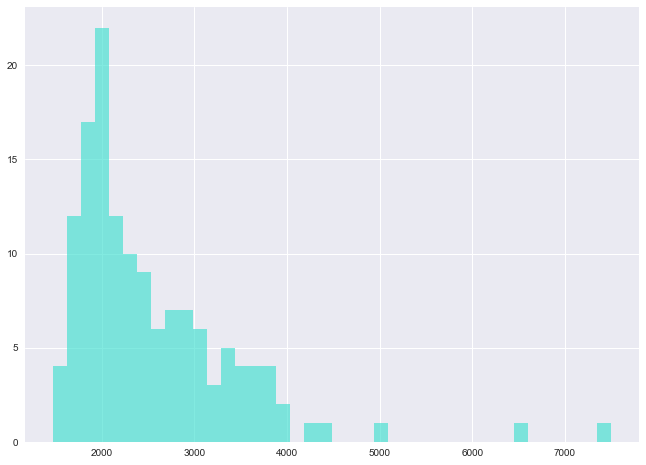

In [291]:
ax = hist_df['2018-04'].hist(figsize=(11,8), bins=40, color="turquoise", alpha=.65)

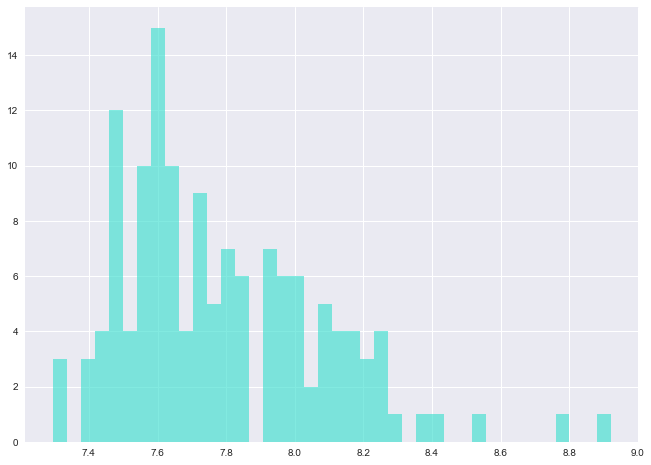

In [292]:
ax = hist_df['2018-04'].apply(np.log).hist(figsize=(11,8), bins=40, color="turquoise", alpha=.65)

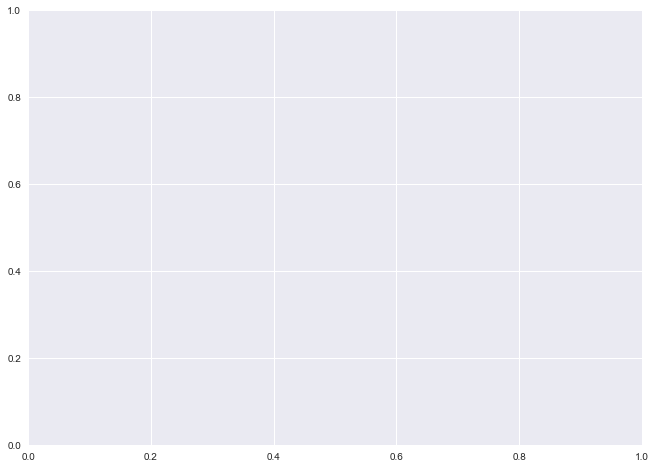

In [263]:
fig, ax = plt.subplots(figsize=(11, 8))

Text(0.5,1,'xxx')

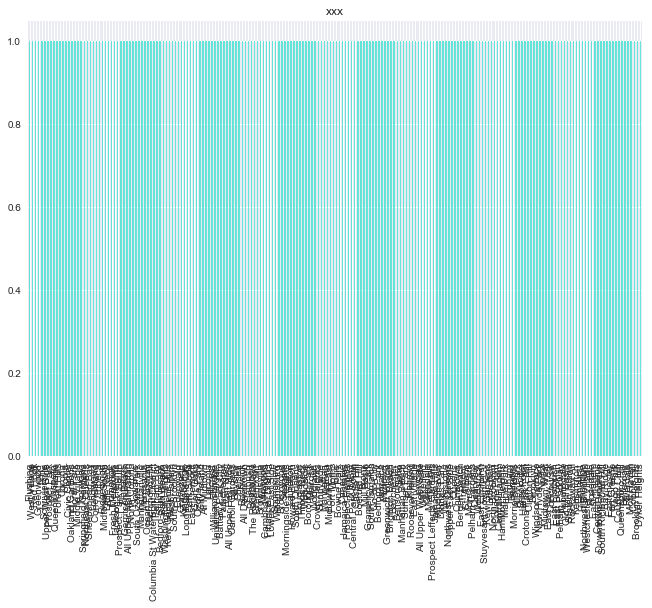

In [278]:
ax = hist_df['areaName'].value_counts().plot.bar(figsize=(11,8), color='turquoise', alpha=.8)
ax.set_title('xxx')

Text(0.5,1,'xxx')

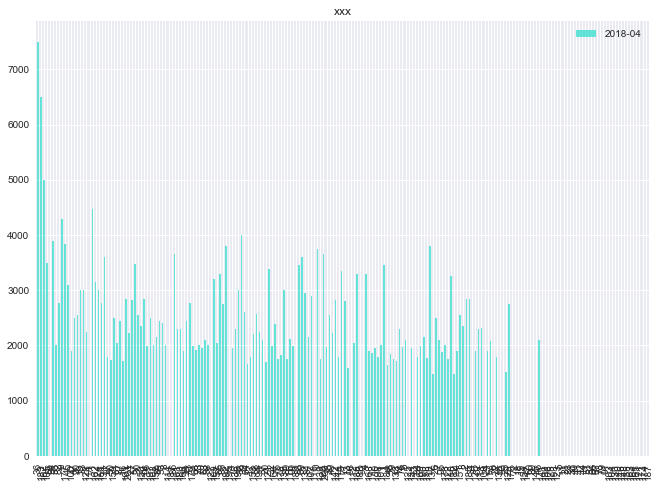

In [279]:
ax = hist_df.plot.bar(figsize=(11,8), color='turquoise', alpha=.8)
ax.set_title('xxx')

In [ ]:
ax = grouped['SubscriptionId'
            ].value_counts(normalize=True
            ).sort_index(
            ).plot.bar(figsize=(11,8), color='turquoise', alpha=.65)

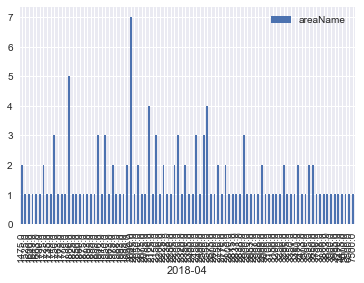

In [283]:
hist_df[['areaName', '2018-04']].groupby('2018-04').count().plot.bar()

In [ ]:
gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

In [ ]:
histcount = pd.Series(hist_df.count(axis=1, numeric_only=True), name='count')

In [ ]:
histsum = pd.Series(hist_df.sum(axis=1), name='sum')

In [ ]:
hist_df = pd.concat([hist_df, histcount, histsum], axis=1)

In [ ]:
hist_df['avg'] = histsum / histcount

In [ ]:
hist_df['avg'] = hist_df['sum'] / hist_df['count']

In [ ]:
hist_df.set_index('areaName', inplace=True)

In [ ]:
hist_df

In [ ]:
hist_df['avg'].hist()

In [ ]:
np.histogram(hist_df['avg'], bins=10)

## Pick 3-5 Areas, for which there is data for the entire provided time period, and form a new table out of these

In [430]:
len(mar_df)#.head()

202

In [431]:
mar_df.isnull().any(axis=1)

36     False
183    False
167    False
105    False
56      True
54     False
55      True
82      True
9      False
177     True
45     False
100     True
47      True
90      True
19     False
33     False
128     True
111     True
71     False
162    False
124    False
156     True
131    False
97      True
50      True
159     True
61      True
87     False
16      True
191     True
       ...  
5       True
11      True
21      True
28      True
31      True
40      True
41      True
42      True
44      True
51      True
52      True
66      True
67      True
73      True
79      True
91      True
103     True
104     True
130     True
140     True
146     True
148     True
155     True
163     True
164     True
165     True
171     True
173     True
174     True
187     True
Length: 202, dtype: bool

In [432]:
mar_df[~mar_df.isnull().any(axis=1)]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0,2000.0
45,Cobble Hill,Brooklyn,neighborhood,1900.0,2350.0,2225.0,2340.0,2400.0,2340.0,2450.0,...,3176.0,3176.0,3325.0,3500.0,3450.0,3195.0,3300.0,3700.0,1900.0,1800.0
19,Boerum Hill,Brooklyn,neighborhood,2600.0,2700.0,2600.0,2500.0,2500.0,2463.0,2475.0,...,3400.0,3257.0,3225.0,3200.0,3200.0,3275.0,3548.0,4150.0,2463.0,1687.0
33,Carroll Gardens,Brooklyn,neighborhood,2275.0,2225.0,2275.0,2175.0,2200.0,2200.0,2250.0,...,3200.0,3000.0,3000.0,2998.0,3000.0,2975.0,2875.0,3798.0,2175.0,1623.0
71,Flatiron,Manhattan,neighborhood,3895.0,3750.0,3550.0,3695.0,3893.0,3850.0,3900.0,...,4550.0,4581.0,4600.0,4600.0,4850.0,4800.0,4500.0,5100.0,3550.0,1550.0


In [433]:
len(mar_df[~mar_df.isnull().any(axis=1)])

69

In [434]:
mar_df[~mar_df.isnull().any(axis=1)].head(5)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0


In [435]:
full_data = mar_df[~mar_df.isnull().any(axis=1)].copy().head(5)

In [436]:
full_data[full_data.isnull().any(axis=1)]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff


In [437]:
full_data.drop(['max', 'min', 'diff'], axis=1, inplace=True)

In [438]:
len(full_data)

5

##  Make a time-series plot of the median rents for these Areas

In [439]:
full_data.drop(['Borough', 'areaType'], axis=1, inplace=True)

In [440]:
full_data.set_index('areaName', inplace=True)

In [441]:
full_data = full_data.T

In [443]:
full_data.head()

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO
2010-01,6000.0,6500.0,5200.0,3295.0,3275.0
2010-02,6000.0,6773.0,5288.0,3050.0,3200.0
2010-03,5500.0,6500.0,5275.0,3000.0,2800.0
2010-04,6500.0,6400.0,4950.0,2999.0,2875.0
2010-05,6500.0,6500.0,4197.0,2885.0,2800.0


In [444]:
full_data.columns

Index(['Central Park South', 'Tribeca', 'Soho', 'Little Italy', 'DUMBO'], dtype='object', name='areaName')

In [445]:
full_data.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11'],
      dtype='object', length=107)

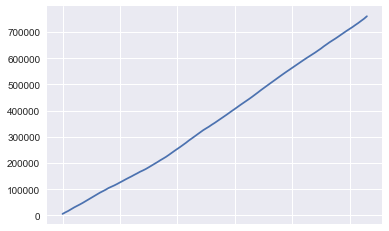

In [446]:
ts = pd.Series(full_data['Central Park South'])
ts = ts.cumsum()
ts.plot()

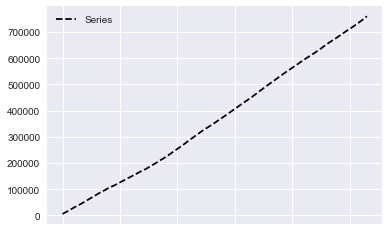

In [447]:
plt.figure(); ts.plot(style='k--', label='Series'); plt.legend()

<Figure size 432x288 with 0 Axes>

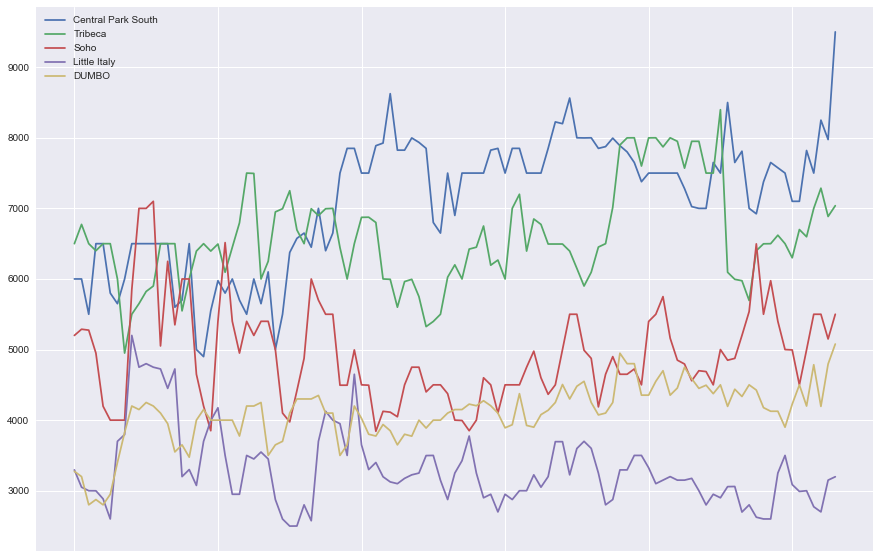

In [448]:
df = full_data
#df = df.cumsum()
plt.figure(); df.plot(figsize=(15,10)); plt.legend()

In [408]:
pd.to_datetime('2010-01')

Timestamp('2010-01-01 00:00:00')

In [452]:
df.reset_index(inplace=True)

In [454]:
df['Date'] = df['index'].apply(pd.to_datetime)

In [455]:
df.set_index('Date', inplace=True)

In [456]:
df.drop('index', axis=1, inplace=True)

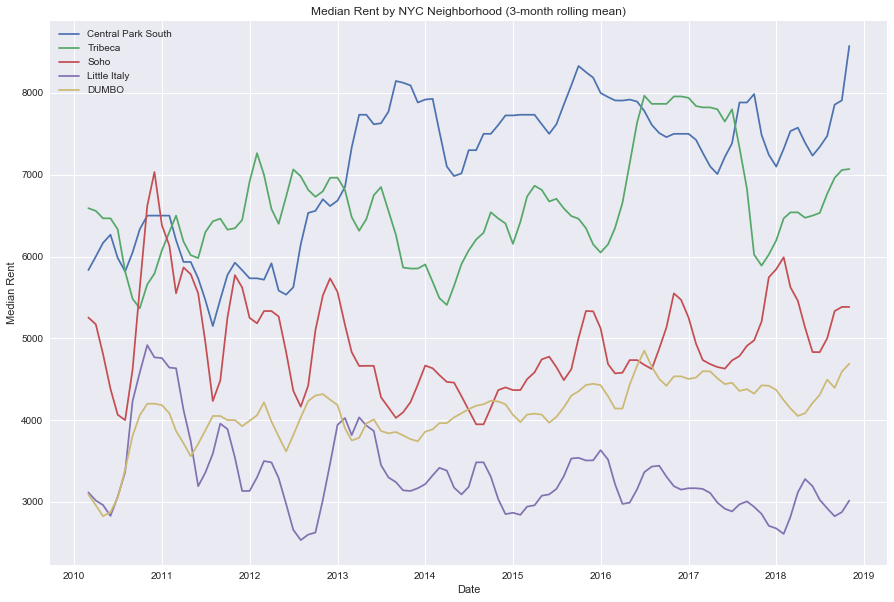

In [470]:
fig, ax = plt.subplots(figsize=(15, 10))
for c in df.columns:
    ax.plot(df[c].index, df[c].rolling(3).mean(), label=c)
ax.set_xlabel('Date')
ax.set_ylabel('Median Rent')
ax.set_title('Median Rent by NYC Neighborhood (3-month rolling mean)')
ax.legend()
plt.show()

In [374]:
full_data["CP_rolling_30"] = (full_data['Central Park South']*100).rolling(30).mean()

In [375]:
full_data

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO,CP_rolling_30
2010-01,6000.0,6500.0,5200.0,3295.0,3275.0,NaN
2010-02,6000.0,6773.0,5288.0,3050.0,3200.0,NaN
2010-03,5500.0,6500.0,5275.0,3000.0,2800.0,NaN
2010-04,6500.0,6400.0,4950.0,2999.0,2875.0,NaN
2010-05,6500.0,6500.0,4197.0,2885.0,2800.0,NaN
2010-06,5800.0,6500.0,4000.0,2600.0,2950.0,NaN
2010-07,5650.0,6000.0,4000.0,3700.0,3400.0,NaN
2010-08,6000.0,4950.0,4000.0,3795.0,3825.0,NaN
2010-09,6500.0,5500.0,5850.0,5200.0,4200.0,NaN
2010-10,6500.0,5650.0,7000.0,4750.0,4150.0,NaN


In [ ]:
#ax = full_data[["Date", "Conv"]].dropna().set_index("Date").plot(figsize=(11, 8))
#t = ax.set_title("Conversion rate (percent)")

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

## explore pivot tables?

In [ ]:
b_df.pivot_table(b_df, values=cols, index=['Borough'], columns=[cols], aggfunc=np.sum)

# --------------------------------------------------------------------------------------------

## COME BACK TO THIS - exploration of `.stack` and `.groupby`

In [ ]:
t_df.stack()

In [ ]:
t_df.stack().max()

In [ ]:
t_df.stack().min()

In [ ]:
#t_df.groupby(['areaName']).B.transform(max)

# --------------------------------------------------------------------------------------------

## explore transposing the data and setting YearMonth as the index 

In [ ]:
drop_df.set_index('areaName', inplace=True)

In [ ]:
t_df = drop_df.T

In [ ]:
t_df

In [ ]:
t_df.index.name = 'YearMonth'

In [ ]:
t_df

In [ ]:
t_df.reset_index(inplace=True)

In [ ]:
t_df.head()

In [ ]:
t_df['YearMonth'].unique()

In [ ]:
len(t_df['YearMonth'])

In [ ]:
t_df[t_df['YearMonth']=='2010-01']

# --------------------------------------------------------------------------------------------

## EDA

In [ ]:
mar_df.describe()

In [ ]:
mar_df.groupby('Borough').size()

In [ ]:
mar_df['Borough'].value_counts()

In [ ]:
mar_df[mar_df["Borough"].isin(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'])].groupby("Borough").size().transform(lambda x: (x/sum(x))*100)

In [ ]:
mar_df['Borough'].value_counts(normalize=True) * 100

# --------------------------------------------------------------------------------------------

## enter exploratory  

In [ ]:
exploratory.center_scale_plot(mar_df["box_pre_return_margin"], np.mean, np.std)

# --------------------------------------------------------------------------------------------